# tensorflow 入门
## 使用顺序 API 构建图像分类器
### 准备数据

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 训练模型
#### 利用顺序 API

In [5]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
model.save("keras_model.h5")

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7293 - accuracy: 0.7587 - val_loss: 0.5496 - val_accuracy: 0.8098
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4903 - accuracy: 0.8282 - val_loss: 0.4753 - val_accuracy: 0.8332
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4459 - accuracy: 0.8424 - val_loss: 0.4324 - val_accuracy: 0.8520
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4177 - accuracy: 0.8520 - val_loss: 0.4092 - val_accuracy: 0.8556
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3957 - accuracy: 0.8611 - val_loss: 0.3853 - val_accuracy: 0.8674
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3796 - accuracy: 0.8660 - val_loss: 0.3693 - val_accuracy: 0.8708
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3666 - accuracy: 0.8703 - val_loss: 0.3622 - val_ac

#### 可微调超参数的训练

In [6]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping

def build_model(n_hidden=1, n_neurons=50, learning_rate=3e-3, input_shape=[28, 28]):
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation='relu'))
    # model.add(layers.Dense(300, activation='relu'))
    # model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

keras_cls = keras.wrappers.scikit_learn.KerasClassifier(build_model)

keras_cls.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
mse_test = keras_cls.score(X_test, y_test)

# param_dist = {
#     "n_hidden": [1, 2, 3],
#     "n_neurons": np.arange(30, 100),
#     "learning_rate": reciprocal(3e-6, 3e-2),
# }
# rnd_search_cv = RandomizedSearchCV(keras_cls, param_dist, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100


<ipython-input-6-1b4b8db8a975>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_cls = keras.wrappers.scikit_learn.KerasClassifier(build_model)
C:\Users\x50021862\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1719/1719 [==============================] - 1s 757us/step - loss: 1.0789 - accuracy: 0.6606 - val_loss: 0.7553 - val_accuracy: 0.7506
Epoch 2/100
1719/1719 [==============================] - 1s 769us/step - loss: 0.6966 - accuracy: 0.7668 - val_loss: 0.6278 - val_accuracy: 0.7904
Epoch 3/100
1719/1719 [==============================] - 1s 711us/step - loss: 0.6094 - accuracy: 0.7963 - val_loss: 0.5747 - val_accuracy: 0.8048
Epoch 4/100
1719/1719 [==============================] - 1s 720us/step - loss: 0.5622 - accuracy: 0.8108 - val_loss: 0.5348 - val_accuracy: 0.8234
Epoch 5/100
1719/1719 [==============================] - 1s 766us/step - loss: 0.5323 - accuracy: 0.8201 - val_loss: 0.5144 - val_accuracy: 0.8288
Epoch 6/100
1719/1719 [==============================] - 1s 701us/step - loss: 0.5108 - accuracy: 0.8272 - val_loss: 0.4933 - val_accuracy: 0.8318
Epoch 7/100
1719/1719 [==============================] - 1s 715us/step - loss: 0.4944 - accuracy: 0.8313 - val_loss: 0.4805 - val_

### 评估模型

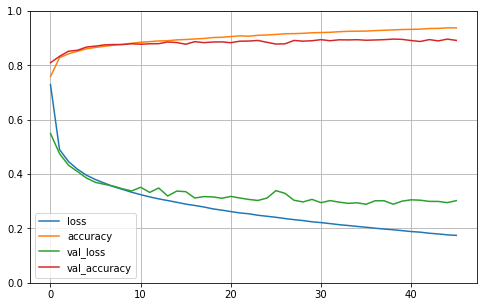

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 使用模型进行预测

In [8]:
mse_evaluation = model.evaluate(X_test, y_test)
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step - loss: 61.3804 - accuracy: 0.8518


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)